Preparing datasets


In [1]:
# imports for array handling and plotting
import numpy as np
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#to keep keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
# keras imports from dataset
import numpy
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils



In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

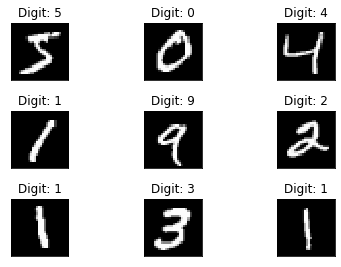

In [5]:
#plot examples
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

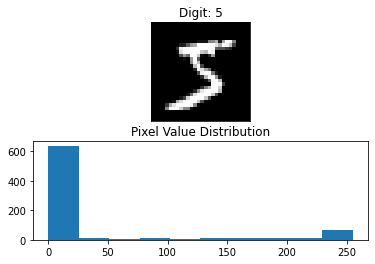

In [6]:
#pixel distribution
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
plt.show()

In [7]:

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# convert class vectors to binary class matrices
num_classes = None
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [9]:
#normalizing data to help with trainings
X_train /= 255
X_test /= 255

In [10]:
#print final shapes
print("Train matrix shape",X_train.shape)
print("Test matrix shape",X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


Train matrix shape (60000, 28, 28, 1)
Test matrix shape (10000, 28, 28, 1)
60000 train samples
10000 test samples


Defining CNN model Architecture


In [11]:
from ast import Num
from pyexpat import model


batch_size = 128
Num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(Num_classes, activation='softmax'))


Compiling the model

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

training the model

In [13]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
print("The model has trained")

Epoch 1/10
469/469 [==============================] - 104s 221ms/step - loss: 2.2848 - accuracy: 0.1269 - val_loss: 2.2560 - val_accuracy: 0.2034
Epoch 2/10
469/469 [==============================] - 120s 257ms/step - loss: 2.2393 - accuracy: 0.2084 - val_loss: 2.2003 - val_accuracy: 0.3685
Epoch 3/10
469/469 [==============================] - 117s 250ms/step - loss: 2.1798 - accuracy: 0.2965 - val_loss: 2.1245 - val_accuracy: 0.5164
Epoch 4/10
469/469 [==============================] - 139s 296ms/step - loss: 2.1006 - accuracy: 0.3786 - val_loss: 2.0218 - val_accuracy: 0.6344
Epoch 5/10
469/469 [==============================] - 128s 274ms/step - loss: 1.9930 - accuracy: 0.4601 - val_loss: 1.8864 - val_accuracy: 0.7016
Epoch 6/10
469/469 [==============================] - 117s 249ms/step - loss: 1.8580 - accuracy: 0.5268 - val_loss: 1.7181 - val_accuracy: 0.7437
Epoch 7/10
469/469 [==============================] - 136s 291ms/step - loss: 1.7010 - accuracy: 0.5733 - val_loss: 1.5246 -

In [14]:
model.save('mnist.h5')
print("The model has been saved")

The model has been saved


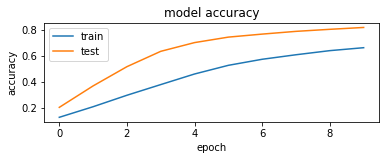

In [15]:
#plotting the loss and accuracy

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')




plt.show()


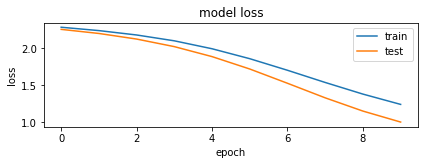

In [16]:
plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()

Evaluate the model performance

In [22]:
model = load_model('mnist.h5')
score = model.evaluate(X_test, y_test, verbose = 2)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 - 4s - loss: 0.9983 - accuracy: 0.8180 - 4s/epoch - 13ms/step
Test loss: 0.9983264803886414
Test accuracy: 0.8180000185966492


In [23]:
# load the model and create predictions on the test set
model = load_model('mnist.h5')
predicted_classes = (model.predict(X_test) > 0.5).astype("int32")




In [25]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


93337  classified correctly
6663  classified incorrectly


In [26]:
Y_predict = model.predict(X_test, batch_size=batch_size)
pred_idx = np.argmax(Y_predict, axis=1)

from sklearn.metrics import classification_report

# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), pred_idx, target_names= [str(c) for c in range(10)]))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       980
           1       0.85      0.95      0.90      1135
           2       0.84      0.82      0.83      1032
           3       0.72      0.89      0.80      1010
           4       0.83      0.81      0.82       982
           5       0.95      0.49      0.65       892
           6       0.79      0.91      0.84       958
           7       0.89      0.82      0.86      1028
           8       0.75      0.71      0.73       974
           9       0.78      0.78      0.78      1009

    accuracy                           0.82     10000
   macro avg       0.83      0.81      0.81     10000
weighted avg       0.83      0.82      0.81     10000



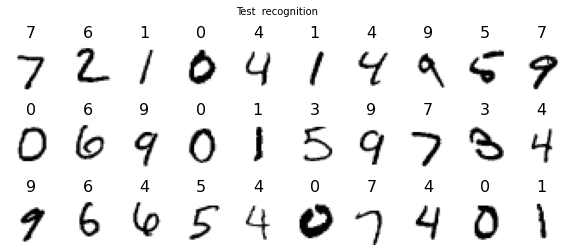

In [28]:
# plot the images in a grid
size = 30
rows = 3
f = plt.figure(figsize=(size // rows, rows + 1))
plt.suptitle("Test  recognition", fontsize=10)
for i in range(size):
    sp = f.add_subplot(rows, -(-size // rows), i + 1)
    sp.axis('Off')
    plt.imshow(X_test[i][:,:,0], cmap='gray_r')
    sp.set_title(Y_predict[i].argmax(), fontsize=16)

plt.show()

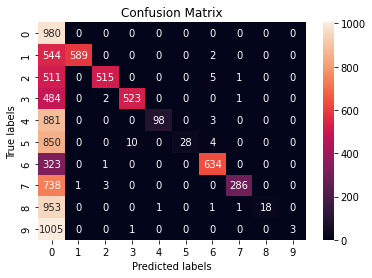

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

T5_lables = ['4TCM','WCM','WSCCM','IWCM','CCM']    

ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(predicted_classes).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
